# [Программирование на Python (SCS)](https://compscicenter.ru/courses/python/2015-autumn/classes/)

## Лектор Сергей Лебедев:  sergei.a.lebedev@gmail.com


|     **Дата**     |   **Название**  |     |
|:----------------:|:---------------:|:-----------------:|
| 19 октября 2015      |    Исключения и менеджеры контекста| 

# 7. Исключения и менеджеры контекста
### Зачем нужны исключения?
- для обработки исключительных (непредвиденных) ситуаций


Исключения — это ошибки, которые можно обрабатывать.
В этом их прелесть.


In [1]:
[0] * int(1e16)  # Memory error
import foobar    # ImportError: No module named 'foobar'
[1, 2, 3] + 4    # TypeError: can only concatenate list to list


OverflowError: cannot fit 'int' into an index-sized integer

# Слайд 2. Обработка исключений: try...except

Для обработки исключений в Python используются
операторы `try` и `except`:
```
try:
    something_dangerous()
except (ValueError, ArithmeticError):
    pass
except TypeError as e:
    pass
```
Ветка **except** принимает два аргумента:
1. выражение, возвращающее тип или кортеж типов,
2. опциональное имя для перехваченного исключения.
- Исключение `e` обрабатывается веткой **except**, если её
первый аргумент expr _можно сопоставить_ с исключением:
**isinstance(e, expr)**
- При наличии нескольких веток **except** интерпретатор
сверху вниз ищет подходящую

# Слайд 3. подробнее о try...except

На месте выражения в ветке except может стоять любое
выражение, например, вызов функции или обращение к
переменной:
```
try:
    something_dangerous()
except Exception as e:
    try:
        something_else()
    except type(e):  # Какое исключение мы
        pass         # перехватим?
```
• Время жизни переменной `e` ограничивается веткой `except`:

In [2]:
try:
    1 + "42"
except TypeError as e:
    pass  # Что делать, если нам нужно e?
e

NameError: name 'e' is not defined

# Слайд 4. Встроенные исключения
- **BaseException** — базовый класс для встроенных
исключений в Python.


In [4]:
BaseException.__subclasses__()

[Exception, GeneratorExit, SystemExit, KeyboardInterrupt]

- Напрямую от класса **BaseException** наследуются только
системные исключения и исключения, приводящие к
завершению работы интерпретатора.
- Все остальные встроенные исключения, а также
исключения, объявленные пользователем, должны
наследоваться от класса **Exception**.
- Отсюда следует, что, чтобы обработать любое исключение,
достаточно написать:

In [ ]:
try:
    something_dang()
except Exception:  # Почему не BaseException?
    pass

# Слайд 5. Встроенные исключения: AssertionError

Исключение **AssertionError** поднимается, когда условие
оператора `assert` не выполняется:

In [6]:
assert 2 + 2 == 5, ("Math", "still", "works")

AssertionError: ('Math', 'still', 'works')

Оператор `assert` используется для ошибок, которые могут
возникнуть только в результате ошибки программиста,
поэтому перехватывать **AssertionError** считается дурным
тоном

# Слайд 6. Встроенные исключения: ImportError и NameError
Если оператор **import** не смог найти модуль с указанным
именем, поднимается исключение **ImportError**:


In [ ]:
import foobar  # ImportError: No module named 'foobar'

 **NameError** поднимается, если не была найдена локальная
или глобальная переменная:

In [ ]:
foobar   # NameError: name 'foobar' is not defined

# Слайд 7. Встроенные исключения: AttributeError и LookupError
Исключение **AttributeError** поднимается при попытке
прочитать или (в случае `__slots__`) записать значение в
несуществующий атрибут:

In [ ]:
object().foobar  # AttributeError: 'object' object has no attribute 'foobar'

Исключения **KeyError** и **IndexError** наследуются от
базового класса **LookupError** и поднимаются, если в
контейнере нет элемента по указанному ключу или
индексу:

In [ ]:
{}["foobar"]  # KeyError: 'foobar'
[][0]         # IndexError: list index out of range

# Слайд 8. Встроенные исключения: ValueError и TypeError
Исключение **ValueError** используется в случаях, когда
другие более информативные исключения, например,
**KeyError**, не применимы:

In [ ]:
"foobar".split("")  # ValueError: empty separator

Исключение **TypeError** поднимается, когда оператор,
функция или метод вызываются с аргументом
несоответствующего типа:

In [ ]:
b"foo" + "bar"  # TypeError: can't concat bytes to str

Полный список исключений можно найти в документации
языка https://docs.python.org/3/library/exceptions.html

# Слайд  9. Исключения, объявленные пользователем
Для объявления нового типа исключения достаточно
объявить класс, наследующийся от базового класса
**Exception**.
- Хорошая практика при написании библиотек на Python —
объявлять свой базовый класс исключений, например:

In [9]:
class CSCException(Exception):
    pass
class TestFailure(CSCException):
    def __str__(self):
        return "lecture test failed"
    

Наличие базового класса позволяет пользователю
обработать любое исключение, специфичное для
библиотеки в одной ветке **except**:

In [10]:
try:
    do_something()
except CSCException:
    pass

NameError: name 'do_something' is not defined

# Слайд 10. Интерфейс исключений
Интерфейс исключений в Python довольно нехитрый:
- атрибут **args** хранит кортеж аргументов, переданных
конструктору исключения,
- атрибут `__traceback__` содержит информацию о стеке
вызовов на момент возникновения исключения.

In [12]:
try:
    1 + "42"
except Exception as e:
    caught = e
caught.args

("unsupported operand type(s) for +: 'int' and 'str'",)

In [14]:
caught.__traceback__

In [15]:
import traceback
traceback.print_tb(caught.__traceback__)

  File "<ipython-input-12-a6b0edc705e5>", line 2, in <module>
    1 + "42"


# Слайд 11. Оператор raise
Поднять исключение можно с помощью оператора **raise**:


In [ ]:
raise TypeError("type mismatch")  # TypeError: type mismatch

Аргумент оператора **raise** должен наследоваться от
базового класса **BaseException**:

In [ ]:
raise 42  # TypeError: exceptions must derive from BaseException

Если вызвать оператор **raise** без аргумента, то он
поднимет последнее пойманное исключение или, если
такого исключения нет, **RuntimeError**.

In [ ]:
raise  # RuntimeError: No active exception to reraise

# Слайд 12. Оператор raise from

In [16]:
try:
    {}["foobar"]
except KeyError as e:
    raise RuntimeError("Ooops!") from e

RuntimeError: Ooops!

# Слайд 13. Обработка исключений: try...finally
Иногда требуется выполнить какое-то действие вне
зависимости от того, произошло исключение или нет,
например, закрыть файл:

In [18]:
try:
    handle = open("example.txt", "wt")
    try:
        do_something(handle)
    finally:
        handle.close()
except IOError as e:
    print(e, file=sys.stderr)

NameError: name 'do_something' is not defined

Аналогичным образом нужно работать с любыми другими
ресурсами: сетевыми соединениями, примитивами
синхронизации.

# Слайд 14. Обработка исключений: try...else
С помощью ветки **else** можно выполнить какое-то
действие в ситуации, когда внутри **try** блока не возникло
исключения:


In [ ]:
try:
    handle = open("example.txt", "wt")
else:
    report_success(handle)
except IOError as e:
    print(e, file=sys.stderr)

Чем использование else лучше следующего варианта?

In [ ]:
try:
    handle = open("example.txt", "wt")
    report_success(handle)
except IOError as e:
    print(e, file=sys.stderr)

# Слайд 15. Цепочки исключений: except и оператор raise

In [19]:
try:
    {}["foobar"]
except KeyError:
    "foobar".split("")

ValueError: empty separator

# Слайд 16. Цепочки исключений: finally и оператор raise

In [20]:
try:
    {}["foobar"]
finally:
    "foobar".split("")

ValueError: empty separator

# Слайд 17. Исключения: резюме
- Механизм обработки исключений в Python похож на
аналогичные конструкции в С++ и Java, но Python
расширяет привычную пару ``try...except`` веткой ``else``.
- Поднять исключение можно с помощью оператора raise,
его семантика эквивалентна `throw` в C++ и Java.
- В Python много встроенных типов исключений, которые
можно и нужно использовать при написании функций и
методов.
- Для объявления нового типа исключения достаточно
унаследоваться от базового класса **Exception**.
- Два важных правила при работе с исключениями:
- минимизируйте размер ветки **try**,
- всегда старайтесь использовать наиболее специфичный тип
исключения в ветке **except**

# Слайд 18. Зачем нужны менеджеры контекста?
Менеджеры контекста позволяют компактно выразить уже
знакомый нам паттерн управления ресурсами:

In [21]:
r = acquire_resource()
try:
    do_something(r)
finally:
    release_resource(r)

NameError: name 'acquire_resource' is not defined

С помощью менеджера контекста пример выше можно
записать так:

In [22]:
with acquire_resource() as r:
    do_something(r)

NameError: name 'acquire_resource' is not defined

Действие _release_resource_ будет выполнено
автоматически, вызывать его явно не нужно.

# Слайд 19. Протокол менеджеров контекста
Протокол менеджеров контекста состоит из двух методов.
- Метод `__enter__` инициализирует контекст, например,
открывает файл или захватывает мьютекс. Значение,
возвращаемое методом `__enter__`, записывается по
имени, указанному после оператора **as**.
>- Метод ``__exit__`` вызывается после выполнения тела
оператора **with**. Метод принимает три аргумента:
1. тип исключения,
2. само исключение и
3. объект типа traceback.
Если в процессе исполнения тела оператора **with** было
поднятно исключение, метод `__exit__` может подавить его,
вернув **True**.
- Экземпляр **любого** класса, реализующего эти два метода,
является менеджером контекста.

# Слайд 20. Duck typing
http://theregister.co.uk/Print/2007/05/06/fables
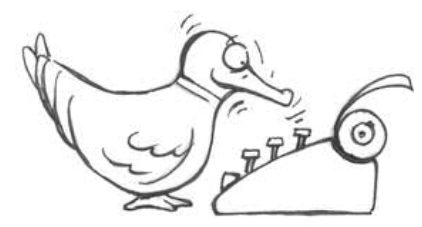

# Слайд 21. “Семантика” оператора with
Напоминание:


In [23]:
with acquire_resource() as r:
    do_something(r)

NameError: name 'acquire_resource' is not defined

Процесс исполнения оператора with можно
концептуально записать так:

In [25]:
manager = acquire_resource()
r = manager.__enter__()

try:
    do_something(r)
finally:
    exc_type, exc_value, tb = sys.exc_info()
    suppress = manager.__exit__(exc_type,
                exc_value, tb)
    if exc_value is not None and not suppress:
        raise exc_value

NameError: name 'acquire_resource' is not defined

# Слайд 22. Расширенные возможности оператора with
Оператор **with** позволяет работать с несколькими
контекстными менеджерами одновременно:


In [27]:
with acquire_resource() as r, \
    acquire_other_resource() as other:
    do_something(r, other)

NameError: name 'acquire_resource' is not defined

In [29]:
Такая запись эквивалентна двум вложенным менеджерам
контекста:

SyntaxError: invalid syntax (<ipython-input-29-79df8db1ba42>, line 1)

In [ ]:
with acquire_resource() as r:
    with acquire_other_resource() as other:
        do_something(r, other)

In [31]:
Можно также использовать оператор with без указания
имени переменной:

SyntaxError: invalid syntax (<ipython-input-31-48a9ecbdfd3a>, line 1)

In [ ]:
with acquire_resource():
    do_something()

# Слайд 23. Примеры менеджеров контекста: opened


In [ ]:
from functools import partial
    class opened:
        def __init__(self, path, *args, **kwargs):
            self.opener = partial(open, path,
                    *args, **kwargs)

        def __enter__(self):
            self.handle = self.opener()
            return self.handle

        def __exit__(self, *exc_info):
            self.handle.close() # Почему можно обойтись
            del self.handle # без return?

with opened("./example.txt", mode="rt") as handle:
    pass

<font color=blue>Капитан сообщает</font>
`opened` интересен только в качестве примера, потому что файлы
в Python уже поддерживают протокол менеджеров контекста

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.

# Слайд 4.